## Cargar el dataframe

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)   # mostrar todas las filas del df

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import regex as re

# para pintar
import pylab as plt
import seaborn as sns

#para que salga el grafico
%matplotlib inline

In [2]:
sharks_ori = pd.read_csv('../Data/attacks.csv', encoding='latin1')

In [3]:
sharks_ori.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
sharks1 = sharks_ori.copy()

In [5]:
sharks1.shape

(25723, 24)

In [6]:
sharks1.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [7]:
sharks1['Unnamed: 22'].value_counts()

stopped here    1
Name: Unnamed: 22, dtype: int64

In [8]:
sharks1['Unnamed: 23'].value_counts()

Teramo             1
change filename    1
Name: Unnamed: 23, dtype: int64

In [9]:
sharks1.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

### Vamos a comprobar las columnas con valores nulos

In [10]:
nan_cols=sharks1.isna().sum()

nan_cols[nan_cols>0]

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

### Ahora definimos una función para checkear todas las columnas y el porcentaje de valores nulos que contienen, así como crear un gráfico que lo represente.

In [11]:

def check_nan(df: pd.DataFrame) -> None:
    
    nan_cols=df.isna().mean() * 100  # el porcentaje
    
    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    plt.figure(figsize=(10, 6))  # inicia la figura y establece tamaño

    sns.heatmap(df.isna(),  # mapa de calor
                yticklabels=False,
                cmap='viridis',
                cbar=False)

    plt.show();

'N nan cols: 24'

Case Number               66.170353
Date                      75.500525
Year                      75.508300
Type                      75.516075
Country                   75.694903
Area                      77.269370
Location                  77.599813
Activity                  77.615364
Name                      76.316915
Sex                       77.697003
Age                       86.506240
Injury                    75.609377
Fatal (Y/N)               77.595926
Time                      88.539439
Species                   86.533453
Investigator or Source    75.566614
pdf                       75.500525
href formula              75.504412
href                      75.500525
Case Number.1             75.500525
Case Number.2             75.500525
original order            75.473312
Unnamed: 22               99.996112
Unnamed: 23               99.992225
dtype: float64

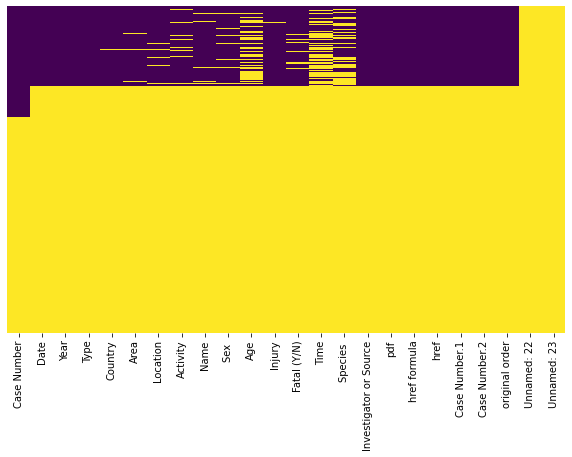

In [12]:
check_nan(sharks1)

### Las dos últimas columnas tienen cerca del 100% de valores nulos, por lo que las vamos a borrar.

In [13]:
cols=['Unnamed: 22', 'Unnamed: 23']

sharks1.drop(columns=cols, inplace=True)

In [14]:
sharks1.shape, sharks_ori.shape

((25723, 22), (25723, 24))

'N nan cols: 22'

Case Number               66.170353
Date                      75.500525
Year                      75.508300
Type                      75.516075
Country                   75.694903
Area                      77.269370
Location                  77.599813
Activity                  77.615364
Name                      76.316915
Sex                       77.697003
Age                       86.506240
Injury                    75.609377
Fatal (Y/N)               77.595926
Time                      88.539439
Species                   86.533453
Investigator or Source    75.566614
pdf                       75.500525
href formula              75.504412
href                      75.500525
Case Number.1             75.500525
Case Number.2             75.500525
original order            75.473312
dtype: float64

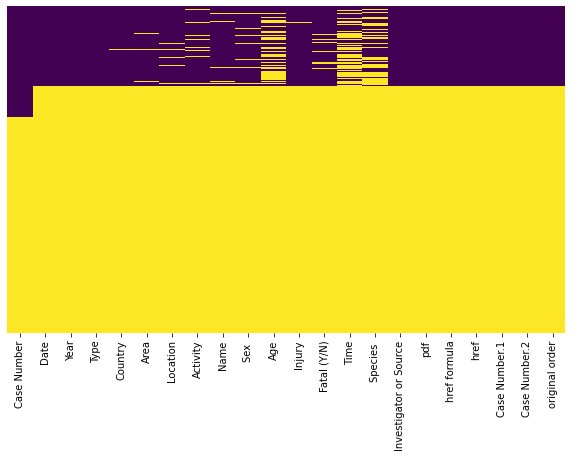

In [15]:
check_nan(sharks1)

### Al haber un alto número de filas con valores nulos en casi todos su campos, lo lógico es deshacerse de esos registros, porque no están aportando información de calidad.

In [16]:
sharks1.shape

(25723, 22)

#### Creamos un indicador de nulos por fila

In [17]:

num_nan=[]

for fila in sharks1.itertuples():
    
    check=[]
    
    for e in fila:
        
        check.append(pd.isna(e))
        
    num_nan.append(sum(check))
    
num_nan[:10]

[0, 1, 1, 2, 2, 3, 0, 1, 0, 1]

In [18]:
sharks1['num_nan']=[sum([pd.isna(e) for e in fila]) for fila in sharks1.itertuples()]

In [19]:
sharks1.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,num_nan
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,1
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,1
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,2
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,2


#### Vamos a fijar un umbral de 15 nulos por fila, si hay más de 15 nulos por fila, voy a borrarla.
 

In [20]:

sharks1[sharks1.num_nan>15].shape, sharks_ori.shape

((19421, 23), (25723, 24))

In [21]:
sharks1.drop(sharks1[sharks1.num_nan>15].index, axis=0, inplace=True)  

#### Ahora borro la columna 'num_nan' porque ya no me sirve

In [22]:

sharks1.drop('num_nan', axis=1, inplace=True)  

'N nan cols: 16'

Case Number                0.015868
Year                       0.031736
Type                       0.063472
Country                    0.793399
Area                       7.219930
Location                   8.568708
Activity                   8.632180
Name                       3.332275
Sex                        8.965408
Age                       44.922247
Injury                     0.444303
Fatal (Y/N)                8.552840
Time                      53.221200
Species                   45.033323
Investigator or Source     0.269756
href formula               0.015868
dtype: float64

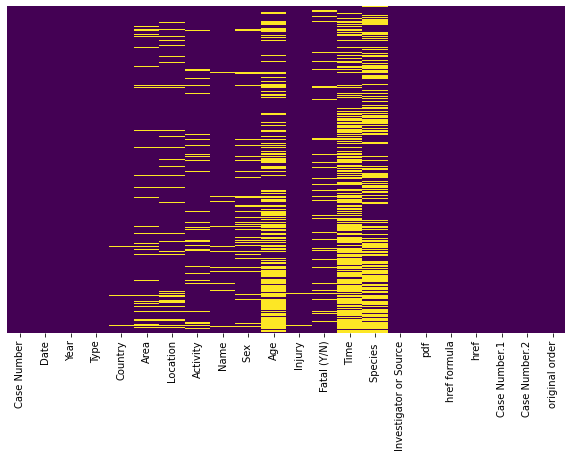

In [23]:
check_nan(sharks1)

In [24]:
sharks1.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6302 entries, 0 to 6301
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6301 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null   

In [25]:
sharks1.shape

(6302, 22)

In [26]:
sharks1.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [27]:
sharks1.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

### Hay columnas con nombres incómodos, vamos a renombrarlas para poder llamarlas más fácilmente

#### Las columnas en cuestión son 'Sex ', 'Fatal (Y/N)', 'Species ', 'Case Number.1' y 'Case Number.2'.

In [28]:
sharks1.rename(columns={'Sex ':'Sex', 'Fatal (Y/N)': 'Fatal', 'Species ': 'Species', 'Case Number.1': 'CaseNumber_1', 'Case Number.2': 'CaseNumber_2'}, inplace=True)

In [29]:
sharks1.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal', 'Time', 'Species',
       'Investigator or Source', 'pdf', 'href formula', 'href', 'CaseNumber_1',
       'CaseNumber_2', 'original order'],
      dtype='object')

In [30]:
sharks1.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6302 entries, 0 to 6301
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6301 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal                   5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null   

### Voy a empezar a rellenar los nulos de las columnas. Primero lo haré con las que considero que sus nulos tienen que ser sustituidos por unknown

In [31]:
sharks1.Type.fillna('unknown', inplace=True)

'N nan cols: 15'

Case Number                0.015868
Year                       0.031736
Country                    0.793399
Area                       7.219930
Location                   8.568708
Activity                   8.632180
Name                       3.332275
Sex                        8.965408
Age                       44.922247
Injury                     0.444303
Fatal                      8.552840
Time                      53.221200
Species                   45.033323
Investigator or Source     0.269756
href formula               0.015868
dtype: float64

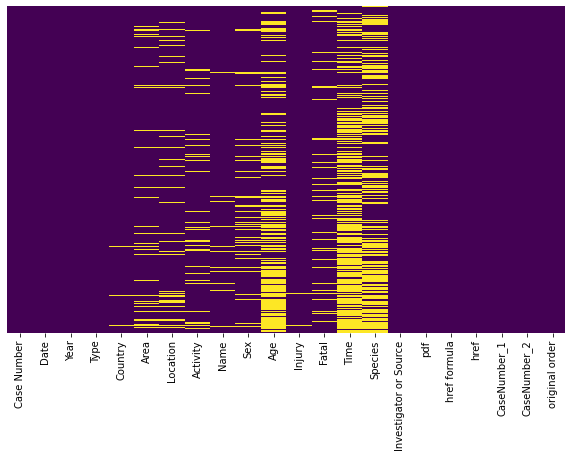

In [32]:
check_nan(sharks1)

In [33]:
sharks1.Country.fillna('unknown', inplace=True)

In [34]:
sharks1.Area.fillna('unknown', inplace=True)

'N nan cols: 13'

Case Number                0.015868
Year                       0.031736
Location                   8.568708
Activity                   8.632180
Name                       3.332275
Sex                        8.965408
Age                       44.922247
Injury                     0.444303
Fatal                      8.552840
Time                      53.221200
Species                   45.033323
Investigator or Source     0.269756
href formula               0.015868
dtype: float64

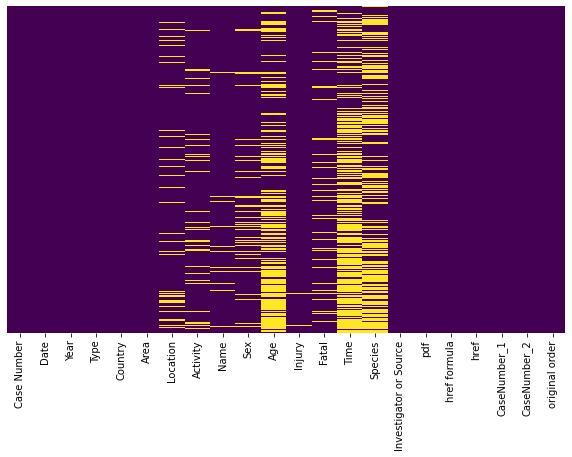

In [35]:
check_nan(sharks1)

In [36]:
sharks1.Location.fillna('unknown', inplace=True)

In [37]:
sharks1.Activity.fillna('unknown', inplace=True)

In [38]:
sharks1.Name.fillna('unknown', inplace=True)

In [39]:
sharks1.Sex.fillna('unknown', inplace=True)

In [40]:
sharks1.Area.value_counts()

Florida                                 1037
New South Wales                          486
unknown                                  455
Queensland                               311
Hawaii                                   298
                                        ... 
Ysabel Island                              1
 Lau Province                              1
South Coast, East New Britain              1
Between Southampton & Canary Islands       1
Moala Island                               1
Name: Area, Length: 826, dtype: int64

'N nan cols: 9'

Case Number                0.015868
Year                       0.031736
Age                       44.922247
Injury                     0.444303
Fatal                      8.552840
Time                      53.221200
Species                   45.033323
Investigator or Source     0.269756
href formula               0.015868
dtype: float64

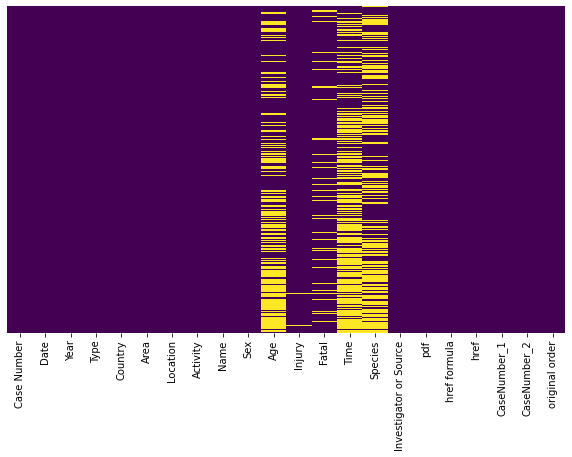

In [41]:
check_nan(sharks1)

In [42]:
sharks1.Age.fillna('unknown', inplace=True)

In [43]:
sharks1.Injury.fillna('unknown', inplace=True)

In [44]:
sharks1.Fatal.fillna('unknown', inplace=True)

In [45]:
sharks1.Time.fillna('unknown', inplace=True)

In [46]:
sharks1.Species.fillna('unknown', inplace=True)

'N nan cols: 4'

Case Number               0.015868
Year                      0.031736
Investigator or Source    0.269756
href formula              0.015868
dtype: float64

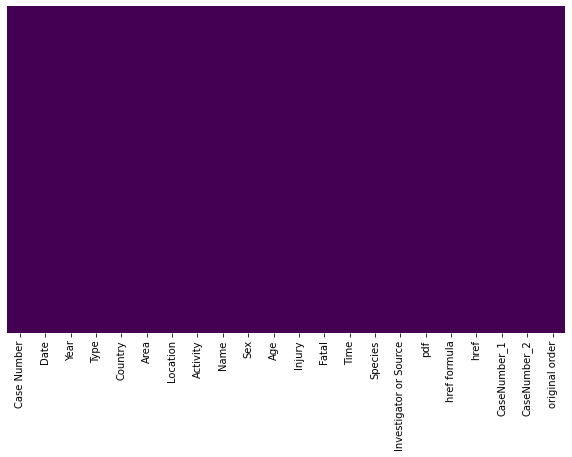

In [47]:
check_nan(sharks1)

In [48]:
sharks1['Investigator or Source'].fillna('unknown', inplace=True)

In [49]:
sharks1['href formula'].fillna('unknown', inplace=True)

'N nan cols: 2'

Case Number    0.015868
Year           0.031736
dtype: float64

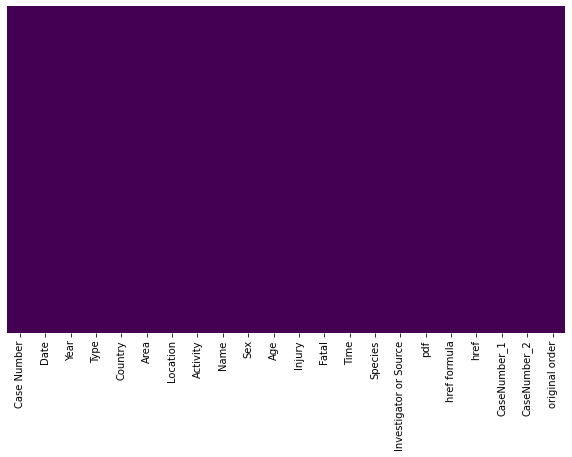

In [50]:
check_nan(sharks1)

In [51]:
sharks1.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,pdf,href formula,href,CaseNumber_1,CaseNumber_2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,unknown,Minor injury to lower leg,N,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [52]:
sharks1.rename(columns={'Case Number':'Case_Number'}, inplace=True)

In [53]:
sharks1.Case_Number.fillna('unknown', inplace=True)

In [54]:
sharks1.Year.fillna('unknown', inplace=True)

'N nan cols: 0'

Series([], dtype: float64)

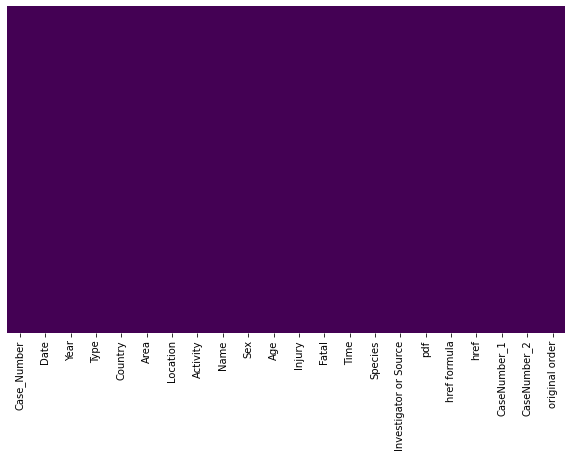

In [55]:
check_nan(sharks1)

### Ahora mismo ya tenemos todas nuestras columnas sin valores nulos.

### ¿Qué columnas me interesa analizar más profundamente, ergo limpiar y preparar?
#### En mi caso, voy a elegir las columnas 'Year', 'Country', 'Sex', 'Age', 'Fatal' y 'Species' para posteriormente explorar insights en torno a ellas.

In [56]:
sharks1.head()

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,pdf,href formula,href,CaseNumber_1,CaseNumber_2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,unknown,Minor injury to lower leg,N,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [57]:
sharks1.Sex.value_counts()



M          5094
F           637
unknown     565
M             2
N             2
lli           1
.             1
Name: Sex, dtype: int64

### Voy a empezar limpiando los valores de las columnas más sencillas.
###### En primer lugar, limpiamos la columna de Sex. Para ello voy a sustituir las 'M ' con M, las 'N' con 'M', y 'lli' y '.' con unknown.

In [58]:
sharks1.Sex.replace(['M ', 'N', 'lli', '.'], 
                                   ['M', 'M', 'unknown', 'unknown'],
                                   inplace=True)

In [59]:
sharks1.Sex.value_counts()


M          5098
F           637
unknown     567
Name: Sex, dtype: int64

##### Ahora voy a limpiar la columna de Fatal. Para ello voy a hacer las siguientes sustituciones

In [60]:
sharks1.Fatal.value_counts()

N          4293
Y          1388
unknown     539
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: Fatal, dtype: int64

In [61]:
#limpio la columna de Fatal sustituyendo valores que no son Y o N:
sharks1.Fatal.replace(['UNKNOWN', ' N', 'M', '2017', 'N ', 'y'], 
                                   ['unknown', 'N', 'N', 'unknown', 'N', 'Y'],
                                   inplace=True)

In [62]:
pd.set_option('display.max_rows', None)   # mostrar todas las filas del df

### Columna Year

In [63]:
sharks1.Year.unique()

array([2018.0, 2017.0, 'unknown', 2016.0, 2015.0, 2014.0, 2013.0, 2012.0,
       2011.0, 2010.0, 2009.0, 2008.0, 2007.0, 2006.0, 2005.0, 2004.0,
       2003.0, 2002.0, 2001.0, 2000.0, 1999.0, 1998.0, 1997.0, 1996.0,
       1995.0, 1984.0, 1994.0, 1993.0, 1992.0, 1991.0, 1990.0, 1989.0,
       1969.0, 1988.0, 1987.0, 1986.0, 1985.0, 1983.0, 1982.0, 1981.0,
       1980.0, 1979.0, 1978.0, 1977.0, 1976.0, 1975.0, 1974.0, 1973.0,
       1972.0, 1971.0, 1970.0, 1968.0, 1967.0, 1966.0, 1965.0, 1964.0,
       1963.0, 1962.0, 1961.0, 1960.0, 1959.0, 1958.0, 1957.0, 1956.0,
       1955.0, 1954.0, 1953.0, 1952.0, 1951.0, 1950.0, 1949.0, 1948.0,
       1848.0, 1947.0, 1946.0, 1945.0, 1944.0, 1943.0, 1942.0, 1941.0,
       1940.0, 1939.0, 1938.0, 1937.0, 1936.0, 1935.0, 1934.0, 1933.0,
       1932.0, 1931.0, 1930.0, 1929.0, 1928.0, 1927.0, 1926.0, 1925.0,
       1924.0, 1923.0, 1922.0, 1921.0, 1920.0, 1919.0, 1918.0, 1917.0,
       1916.0, 1915.0, 1914.0, 1913.0, 1912.0, 1911.0, 1910.0, 1909.0,
   

#### Como tenemos algún valor unknown, los buscamos y los rellenamos fijándonos en la fecha de los campos Date y Case_Number

In [64]:
sharks1.loc[sharks1['Year'] == 'unknown']

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,pdf,href formula,href,CaseNumber_1,CaseNumber_2,original order
187,2017.01.08.R,Reported 08-Jan-2017,unknown,Invalid,AUSTRALIA,Queensland,unknown,Spearfishing,Kerry Daniel,M,35,"No attack, shark made a threat display",unknown,unknown,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0
6079,1836.08.19.R,Reported 19-Aug-1836,unknown,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,unknown,FATAL,Y,unknown,unknown,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0


In [65]:
sharks1.at[187, 'Year'] = 2017
sharks1.at[6079, 'Year'] = 1836

In [66]:
sharks1['Year'] = sharks1['Year'].astype('int')

In [67]:
sharks1.Year.value_counts().head()

2015    143
2017    137
2016    130
2011    128
2014    127
Name: Year, dtype: int64

### Columna Country

In [68]:
sharks1.Country.unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', 'unknown', 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 

In [69]:
sharks1['Country']=sharks1['Country'].replace('Fiji','FIJI')
sharks1['Country']=sharks1['Country'].replace('UNITED ARAB EMIRATES (UAE)', 'UNITED ARAB EMIRATES')
sharks1['Country']=sharks1['Country'].replace('Sierra Leone','SIERRA LEONE')
sharks1['Country']=sharks1['Country'].replace('ST. MAARTIN','ST. MARTIN')                                             
sharks1['Country']=sharks1['Country'].replace('MEXICO ','MEXICO')
sharks1['Country']=sharks1['Country'].replace(' TONGA','TONGA')                                              
sharks1['Country']=sharks1['Country'].replace('SOUTH CHINA SEA','CHINA')
sharks1['Country']=sharks1['Country'].replace('PACIFIC OCEAN ','PACIFIC OCEAN')                                              
sharks1['Country']=sharks1['Country'].replace('NORTH ATLANTIC OCEAN ','NORTH ATLANTIC OCEAN') 
sharks1['Country']=sharks1['Country'].replace('SUDAN?','SUDAN') 
sharks1['Country']=sharks1['Country'].replace(' PHILIPPINES','PHILIPPINES')
sharks1['Country']=sharks1['Country'].replace('SAN DOMINGO','DOMINICAN REPUBLIC')
sharks1['Country']=sharks1['Country'].replace('YEMEN ','YEMEN')                                             
sharks1['Country']=sharks1['Country'].replace('EGYPT ','EGYPT') 
sharks1['Country']=sharks1['Country'].replace('INDIAN OCEAN?','INDIAN OCEAN')   
sharks1['Country']=sharks1['Country'].replace('RED SEA?','RED SEA')
sharks1['Country']=sharks1['Country'].replace('ASIA?','ASIA')
sharks1['Country']=sharks1['Country'].replace('CEYLON (SRI LANKA)','SRI LANKA')    
sharks1['Country']=sharks1['Country'].replace('AFRICA','unknown') 
sharks1['Country']=sharks1['Country'].replace('Coast of AFRICA','unknown') 
sharks1['Country']=sharks1['Country'].replace('Seychelles','SEYCHELLES')                                           

In [70]:
sharks1.Country.unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', 'unknown', 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'FIJI', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'PUERTO RICO', 'ITALY',
       'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'AZORES'

#### Aquellos ataques acontecidos entre dos países o en mares y océanos los voy a calificar como acontecidos en aguas internacionales.

In [71]:
sharks1.loc[sharks1['Country'].str.contains('Ocean', case=False), 'Country'] ='INTERNATIONAL WATERS'
sharks1.loc[sharks1['Country'].str.contains('Sea', case=False), 'Country'] ='INTERNATIONAL WATERS'
sharks1.loc[sharks1['Country'].str.contains('Pacific', case=False), 'Country'] ='INTERNATIONAL WATERS'
sharks1.loc[sharks1['Country'].str.contains('Asia', case=False), 'Country'] ='INTERNATIONAL WATERS'
sharks1.loc[sharks1['Country'].str.contains('between', case=False), 'Country'] ='INTERNATIONAL WATERS'
sharks1.loc[sharks1['Country'].str.contains('/', case=False), 'Country'] ='INTERNATIONAL WATERS'


In [91]:
sharks1.Country.value_counts().index

Index(['USA', 'AUSTRALIA', 'SOUTH AFRICA', 'PAPUA NEW GUINEA', 'NEW ZEALAND',
       'BRAZIL', 'BAHAMAS', 'INTERNATIONAL WATERS', 'MEXICO', 'ITALY',
       ...
       'THE BALKANS', 'ARGENTINA', 'GRAND CAYMAN', 'NETHERLANDS ANTILLES',
       'NORTHERN MARIANA ISLANDS', 'JAVA', 'BAY OF BENGAL', 'SLOVENIA',
       'CURACAO', 'KOREA'],
      dtype='object', length=166)

### Columna Age

In [73]:
sharks1.Age.unique()

array(['57', '11', '48', 'unknown', '18', '52', '15', '12', '32', '10',
       '21', '34', '30', '60', '33', '29', '54', '41', '37', '56', '19',
       '25', '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20',
       '24', '26', '49', '22', '7', '31', '17', '40', '13', '42', '3',
       '8', '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 3

#### Definimos función clean_Age y se la aplicamos a la columna Age para que se vea reflejada en una nueva columna mean_age. En resumen, va a coger aquellas celdas con más de una edad y va a devolver la media de las edades que aparecen en la celda.

In [74]:
def clean_Age(x):
    x = x.lower()
    patron = re.findall('\d+', x)[:5]
    res = [eval(i) for i in patron]
    

    if patron:
        return np.mean(res)
    elif "2to3months" in x: # around 0.208
        return 0.2
    elif "9months" in x:
        return 0.75
    elif "18months" in x:
        return 1.5
    elif "teen" in x: #entre 13 y 19
        return 16
    elif "young" in x: #entre 15 y 24
        return 19.5
    elif "adult" in x: # entre 18 y 65
        return 41.5
    elif "middle" in x : # entre 40 y 60
        return 50
    elif "elderly" in x: # +65
        return 70
    else:
        return 'unknown'

In [75]:
sharks1['mean_age']=sharks1.Age.apply(clean_Age)

In [76]:
sharks1.mean_age.unique()

array([57.0, 11.0, 48.0, 'unknown', 18.0, 52.0, 15.0, 12.0, 32.0, 10.0,
       21.0, 34.0, 30.0, 60.0, 33.0, 29.0, 54.0, 41.0, 37.0, 56.0, 19.0,
       25.0, 69.0, 38.0, 55.0, 35.0, 46.0, 45.0, 14.0, 40.0, 28.0, 20.0,
       24.0, 26.0, 49.0, 22.0, 7.0, 31.0, 17.0, 13.0, 42.0, 3.0, 8.0,
       50.0, 16.0, 82.0, 73.0, 68.0, 51.0, 39.0, 58.0, 47.0, 61.0, 65.0,
       36.0, 66.0, 43.0, 9.0, 72.0, 59.0, 6.0, 27.0, 64.0, 23.0, 71.0,
       44.0, 62.0, 63.0, 70.0, 53.0, 77.0, 74.0, 5.0, 86.0, 12.5, 84.0,
       75.0, 21.5, 87.0, 67.0, 23.5, 41.5, 10.5, 24.5, 1.0, 26.5, 38.6,
       28.5, 15.5, 29.5, 2.5, 81.0, 19.5, 7.5, 78.0, 16.5, 9.5, 2.0, 13.5],
      dtype=object)

In [77]:
sharks1.head()

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,pdf,href formula,href,CaseNumber_1,CaseNumber_2,original order,mean_age
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,57.0
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,11.0
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,48.0
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,unknown,Minor injury to lower leg,N,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,unknown
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,unknown


### Columna Species

In [78]:
sharks1.Species.unique()

array(['White shark', 'unknown', '2 m shark', ..., "12' tiger shark",
       'Blue pointers',
       'Said to involve a grey nurse shark that leapt out of the water and  seized the boy but species identification is questionable'],
      dtype=object)

In [79]:
sharks1.loc[sharks1['Species'].str.contains('white', case=False), 'Species'] = 'White shark'

In [80]:
sharks1.loc[sharks1['Species'].str.contains('invalid', case=False), 'Species'] = 'unknown'
sharks1.loc[sharks1['Species'].str.contains('Shark involvement', case=False), 'Species'] = 'unknown'
sharks1.loc[sharks1['Species'].str.contains('Bull', case=False), 'Species'] = 'Bull shark'
sharks1.loc[sharks1['Species'].str.contains('Tiger', case=False), 'Species'] = 'Tiger shark'
sharks1.loc[sharks1['Species'].str.contains('blacktip shark', case=False), 'Species'] = 'Blacktip shark'
sharks1.loc[sharks1['Species'].str.contains("black-tipped", case=False), 'Species'] = 'Blacktip shark'
sharks1.loc[sharks1['Species'].str.contains('Lemon', case=False), 'Species'] = 'Lemon shark'
sharks1.loc[sharks1['Species'].str.contains('Bronze', case=False), 'Species'] = 'Bronze whaler shark'
sharks1.loc[sharks1['Species'].str.contains('whaler', case=False), 'Species'] = 'Bronze whaler shark'
sharks1.loc[sharks1['Species'].str.contains("gray", case=False), 'Species'] = 'Grey reef shark'
sharks1.loc[sharks1['Species'].str.contains('Grey ', case=False), 'Species'] = 'Grey reef shark'
sharks1.loc[sharks1['Species'].str.contains('reef ', case=False), 'Species'] = 'Grey reef shark'
sharks1.loc[sharks1['Species'].str.contains('Raggedtooth', case=False), 'Species'] = 'Raggedtooth shark'
sharks1.loc[sharks1['Species'].str.contains('Nurse', case=False), 'Species'] = 'Nurse shark'
sharks1.loc[sharks1['Species'].str.contains('Mako', case=False), 'Species'] = 'Mako shark'
sharks1.loc[sharks1['Species'].str.contains('Sand', case=False), 'Species'] = 'Sand shark'
sharks1.loc[sharks1['Species'].str.contains('Sandtiger', case=False), 'Species'] = 'Sandtiger shark'
sharks1.loc[sharks1['Species'].str.contains('Wobbegong', case=False), 'Species'] = 'Wobbegong shark'
sharks1.loc[sharks1['Species'].str.contains('C. leucas', case=False), 'Species'] = 'C. leucas shark'
sharks1.loc[sharks1['Species'].str.contains('spin', case=False), 'Species'] = 'Spinner shark'
sharks1.loc[sharks1['Species'].str.contains('Blue', case=False), 'Species'] = 'Blue shark'
sharks1.loc[sharks1['Species'].str.contains('Salmon', case=False), 'Species'] = 'Salmon shark'
sharks1.loc[sharks1['Species'].str.contains('Dogfish', case=False), 'Species'] = 'Dogfish shark'
sharks1.loc[sharks1['Species'].str.contains('galapagos', case=False), 'Species'] = 'Galapagos shark'
sharks1.loc[sharks1['Species'].str.contains('Hammer', case=False), 'Species'] = 'Hammerhead shark'
sharks1.loc[sharks1['Species'].str.contains('Ragged', case=False), 'Species'] = 'Raggedtooth shark'
sharks1.loc[sharks1['Species'].str.contains('Port', case=False), 'Species'] = 'Port Jackson shark'
sharks1.loc[sharks1['Species'].str.contains('Zambezi', case=False), 'Species'] = 'Zambezi shark'
sharks1.loc[sharks1['Species'].str.contains('Zambessi', case=False), 'Species'] = 'Zambezi shark'
sharks1.loc[sharks1['Species'].str.contains('Zambesi', case=False), 'Species'] = 'Zambezi shark'
sharks1.loc[sharks1['Species'].str.contains('whitetip', case=False), 'Species'] = 'Ocean whitetip shark'
sharks1.loc[sharks1['Species'].str.contains('Porbeagle', case=False), 'Species'] = 'Porbeagle shark'
sharks1.loc[sharks1['Species'].str.contains('angel', case=False), 'Species'] = 'Angel shark'
sharks1.loc[sharks1['Species'].str.contains('spur', case=False), 'Species'] = 'Spurdog shark'
sharks1.loc[sharks1['Species'].str.contains('cookie', case=False), 'Species'] = 'Cookie cutter shark'
sharks1.loc[sharks1['Species'].str.contains('dusky', case=False), 'Species'] = 'Dusky shark'
sharks1.loc[sharks1['Species'].str.contains('seven', case=False), 'Species'] = 'Sevengill shark'
sharks1.loc[sharks1['Species'].str.contains('copper', case=False), 'Species'] = 'Copper shark'
sharks1.loc[sharks1['Species'].str.contains('thresher', case=False), 'Species'] = 'Thresher shark'



#### No puedo asignar una especie a los valores de tiburones con tamaño específico, porque podrían ser distintas especies en distintas fases de crecimiento.

In [81]:
#las que tienen medidas en pies
sharks1.loc[sharks1['Species'].str.contains("\d+'", case=False), 'Species'] = 'unknown'
sharks1.loc[sharks1['Species'].str.contains('\d+"', case=False), 'Species'] = 'unknown'
#las que tienen medidas en metros, cm...
sharks1.loc[sharks1['Species'].str.contains("\d+\s+m", case=False), 'Species'] = 'unknown'
sharks1.loc[sharks1['Species'].str.contains("\d+m", case=False), 'Species'] = 'unknown'
sharks1.loc[sharks1['Species'].str.contains("\d+\s+cm", case=False), 'Species'] = 'unknown'
#los que son small, little, large
sharks1.loc[sharks1['Species'].str.contains("small", case=False), 'Species'] = 'unknown'
sharks1.loc[sharks1['Species'].str.contains("little", case=False), 'Species'] = 'unknown'
sharks1.loc[sharks1['Species'].str.contains("large", case=False), 'Species'] = 'unknown'
#lo mismo por edad
sharks1.loc[sharks1['Species'].str.contains("young", case=False), 'Species'] = 'unknown'
sharks1.loc[sharks1['Species'].str.contains("adult", case=False), 'Species'] = 'unknown'

In [82]:
sharks1.loc[sharks1['Species'].str.contains('unidentified', case=False), 'Species'] = 'unknown'
sharks1.loc[sharks1['Species'].str.contains('no shark', case=False), 'Species'] = 'unknown'
sharks1.loc[sharks1['Species'].str.contains('kg', case=False), 'Species'] = 'unknown'
sharks1.loc[sharks1['Species'].str.contains('invalid', case=False), 'Species'] = 'unknown'
sharks1.loc[sharks1['Species'].str.contains('Questionable', case=False), 'Species'] = 'unknown'
sharks1.loc[sharks1['Species'].str.contains('invalid', case=False), 'Species'] = 'unknown'
sharks1.loc[sharks1['Species'].str.contains('gill', case=False), 'Species'] = 'unknown'
sharks1.loc[sharks1['Species'].str.contains('not', case=False), 'Species'] = 'unknown'
sharks1.loc[sharks1['Species'].str.contains('lb', case=False), 'Species'] = 'unknown'
sharks1.loc[sharks1['Species'].str.contains('juvenile', case=False), 'Species'] = 'unknown'
sharks1.loc[sharks1['Species'].str.contains('2', case=False), 'Species'] = 'unknown'
sharks1.loc[sharks1['Species'].str.contains('incident', case=False), 'Species'] = 'unknown'
sharks1.loc[sharks1['Species'].str.contains('injury', case=False), 'Species'] = 'unknown'
sharks1.loc[sharks1['Species'].str.contains('authenticated', case=False), 'Species'] = 'unknown'
sharks1.loc[sharks1['Species'].str.contains('gill', case=False), 'Species'] = 'unknown'

In [83]:
sharks1['Species'] = sharks1['Species'].map(lambda x: x.lstrip('?<>)"').rstrip('aAbBcC?("'))
sharks1.loc[sharks1['Species'].str.contains('\xa0', case=False, regex=False), 'Species'] ='unknown'
sharks1.loc[sharks1['Species'].str.contains('Unknown', case=False), 'Species'] = 'unknown'
sharks1.loc[sharks1['Species'].str.contains('\d+', case=False), 'Species'] = 'unknown'
sharks1.loc[sharks1['Species'].str.contains('C.', case=False), 'Species'] = 'unknown'
sharks1.loc[sharks1['Species'].str.contains('dog', case=False), 'Species'] = 'Dogfish shark'
sharks1.loc[sharks1['Species'].str.contains('drowning', case=False), 'Species'] = 'unknown'
sharks1.loc[sharks1['Species'].str.contains('several', case=False), 'Species'] = 'unknown'
sharks1.loc[sharks1['Species'].str.contains('gill', case=False), 'Species'] = 'unknown'
sharks1.loc[sharks1['Species'].str.contains('gill', case=False), 'Species'] = 'unknown'


In [84]:
sharks1.loc[sharks1['Species'] == ' ']

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,pdf,href formula,href,CaseNumber_1,CaseNumber_2,original order,mean_age
1348,2007.08.12,12-Aug-2007,2007,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Swimming,female,F,15,"Minor injury, small lacerations to right foot",N,17h35,,"S. Petersohn, GSAF",2007.08.12-girl-NewSmyrnaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2007.08.12,2007.08.12,4955.0,15.0
1357,2007.07.19.b,19-Jul-2007.b,2007,Unprovoked,USA,Hawaii,"Bellows Beach near Wailea Point, Oahu",Snorkeling,Harvey Miller,M,36,Left calf severely bitten,N,15h15,,"Honolulu Advertiser, 7/20/2007; Honolulu Star ...",2007.07.19.b-Miller.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2007.07.19.b,2007.07.19.b,4946.0,36.0
1454,2006.07.25,25-Jul-2006,2006,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,14,Minor lacerations to right foot,N,13h45,,"S. Petersohn, GSAF",2006.07.25-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.07.25,2006.07.25,4849.0,14.0
2400,1995.01.02,02-Jan-1995,1995,Unprovoked,BRAZIL,Pernambuco,Piedade,Surfing,Humberto Moraes de Souza,M,17,Foot bitten,N,unknown,,"San Jose Mercury News, 1/6/1995, p.12A",1995.01.02-H.de-SouzaMoraes.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1995.01.02,1995.01.02,3903.0,17.0
3622,1965.06.00,Jun-1965,1965,Unprovoked,INTERNATIONAL WATERS,unknown,unknown,Treading water,Kikio Naruchima,M,unknown,"FATAL, body not recovered",Y,Morning,,H.D.Baldridge (1994) SAF Case #1510,1965.06.00-Yang.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1965.06.00,1965.06.00,2681.0,unknown
5555,1900.09.13,13-Sep-1900,1900,Unprovoked,USA,Rhode Island,Coddington Cove,Diving,George Brown,M,unknown,No injury,unknown,unknown,,"NY Times, 9/14/1900",1900.09.13-Brown.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1900.09.13,1900.09.13,748.0,unknown


In [85]:
sharks1.at[1348, 'Species'] = 'unknown'
sharks1.at[1357, 'Species'] = 'unknown'
sharks1.at[1454, 'Species'] = 'unknown'
sharks1.at[2400, 'Species'] = 'unknown'
sharks1.at[3622, 'Species'] = 'unknown'
sharks1.at[5555, 'Species'] = 'unknown'

In [86]:
sharks1.Species.value_counts()

unknown                4496
White shark             667
Tiger shark             276
Bull shark              185
Grey reef shark         105
Bronze whaler shark      74
Nurse shark              57
Mako shark               54
Blue shark               53
Wobbegong shark          50
Hammerhead shark         48
Raggedtooth shark        43
Spinner shark            43
Lemon shark              34
Zambezi shark            32
Sand shark               25
Dusky shark              13
Dogfish shark             8
Basking shark             7
Galapagos shark           7
Angel shark               6
Porbeagle shark           6
Thresher shark            4
Salmon shark              3
Whale shark               2
Leopard shark             1
Goblin shark              1
Soupfin shark             1
Silvertip shark           1
Name: Species, dtype: int64

In [87]:
sharks1.info(memory_usage='deep'), sharks_ori.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6302 entries, 0 to 6301
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case_Number             6302 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6302 non-null   int32  
 3   Type                    6302 non-null   object 
 4   Country                 6302 non-null   object 
 5   Area                    6302 non-null   object 
 6   Location                6302 non-null   object 
 7   Activity                6302 non-null   object 
 8   Name                    6302 non-null   object 
 9   Sex                     6302 non-null   object 
 10  Age                     6302 non-null   object 
 11  Injury                  6302 non-null   object 
 12  Fatal                   6302 non-null   object 
 13  Time                    6302 non-null   object 
 14  Species                 6302 non-null   

(None, None)

In [94]:
for c in sharks1.select_dtypes('integer').columns:
    
    sharks1[c]=pd.to_numeric(sharks1[c], downcast='integer')
    
sharks1.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6302 entries, 0 to 6301
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case_Number             6302 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6302 non-null   int16  
 3   Type                    6302 non-null   object 
 4   Country                 6302 non-null   object 
 5   Area                    6302 non-null   object 
 6   Location                6302 non-null   object 
 7   Activity                6302 non-null   object 
 8   Name                    6302 non-null   object 
 9   Sex                     6302 non-null   object 
 10  Age                     6302 non-null   object 
 11  Injury                  6302 non-null   object 
 12  Fatal                   6302 non-null   object 
 13  Time                    6302 non-null   object 
 14  Species                 6302 non-null   

In [95]:
for c in sharks1.select_dtypes('float').columns:
    
    sharks1[c]=pd.to_numeric(sharks1[c], downcast='float')
    
sharks1.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6302 entries, 0 to 6301
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case_Number             6302 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6302 non-null   int16  
 3   Type                    6302 non-null   object 
 4   Country                 6302 non-null   object 
 5   Area                    6302 non-null   object 
 6   Location                6302 non-null   object 
 7   Activity                6302 non-null   object 
 8   Name                    6302 non-null   object 
 9   Sex                     6302 non-null   object 
 10  Age                     6302 non-null   object 
 11  Injury                  6302 non-null   object 
 12  Fatal                   6302 non-null   object 
 13  Time                    6302 non-null   object 
 14  Species                 6302 non-null   

# BONUS: Insights